In [3]:
import pandas as pd

In [4]:
#1.  Read the Bike Details dataset into a Pandas DataFrame and display its
# first 10 rows.
# (Show the shape and column names as well.)
# (Include your Python code and output in the code box below.

df = pd.read_csv("/content/BIKE DETAILS.csv")

print("First 10 rows of the dataset:")
print(df.head(10))

print("\nShape of the dataset:")
print(df.shape)

print("\nColumn names:")
print(df.columns)

First 10 rows of the dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN 

In [7]:
#2. Check for missing values in all columns and describe your approach for
# handling them.
# (Include your Python code and output in the code box below.)




print("Missing values in each column:")
print(df.isnull().sum())

#Approach for Handling Missing Values:-
# Numerical columns: Replace missing values with mean or median
#Categorical columns: Replace missing values with mode
#If missing values are very few: Rows can be removed safely

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


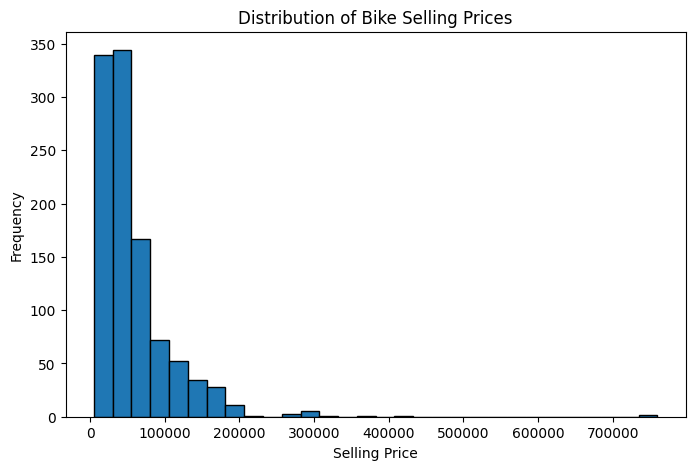

In [8]:
#3. Plot the distribution of selling prices using a histogram and describe the overall trend.
# (Include your Python code and output in the code box below.)

import matplotlib.pyplot as plt

# Plot histogram of selling prices
plt.figure(figsize=(8, 5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Bike Selling Prices")
plt.show()


#Trend Description:-
#a. The histogram shows that most bikes are sold in the lower price range.
#b. The distribution is right-skewed, meaning a few bikes are sold at very high prices.
#c. High-priced bikes appear less frequently compared to budget bikes

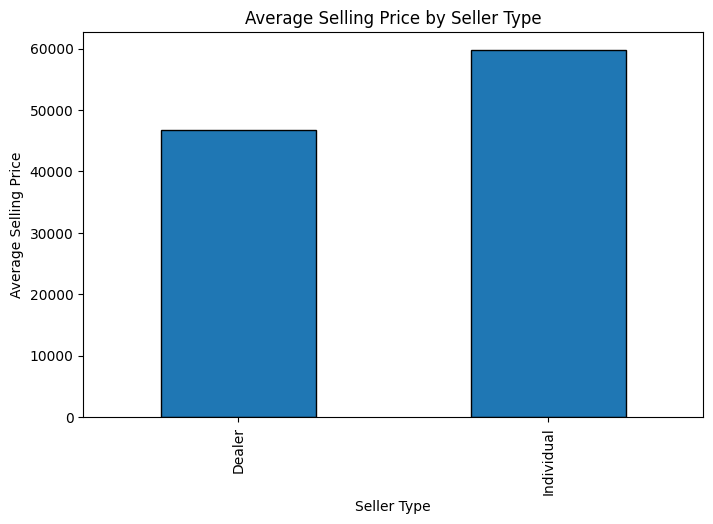

In [9]:
# #4. Create a bar plot to visualize the average selling price for each seller_type and write one observation.
# (Include your Python code and output in the code box below.)

avg_price = df.groupby('seller_type')['selling_price'].mean()

# Plot bar chart
plt.figure(figsize=(8, 5))
avg_price.plot(kind='bar', edgecolor='black')
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller Type")
plt.show()

# # Observation:-
# Dealer sellers generally have a higher average selling price compared to individual sellers.

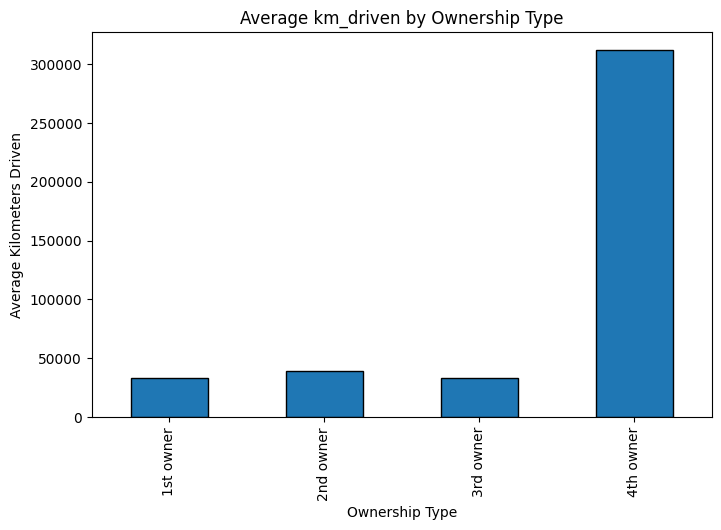

In [10]:
# #5. Compute the average km_driven for each ownership type (1st owner,
# 2nd owner, etc.), and present the result as a bar plot.
# (Include your Python code and output in the code box below.)

import matplotlib.pyplot as plt

avg_km = df.groupby('owner')['km_driven'].mean()

plt.figure(figsize=(8, 5))
avg_km.plot(kind='bar', edgecolor='black')
plt.xlabel("Ownership Type")
plt.ylabel("Average Kilometers Driven")
plt.title("Average km_driven by Ownership Type")
plt.show()

In [12]:
#6. Use the IQR method to detect and remove outliers from the km_driven
# column. Show before-and-after summary statistics.
# (Include your Python code and output in the code box below.)


#Formula:-
#IQR = Q3 − Q1
#Lower Bound = Q1 − 1.5 × IQR
#Upper Bound = Q3 + 1.5 × IQR

# Summary statistics before removing outliers
print("Before removing outliers:")
print(df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Summary statistics after removing outliers
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())

Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


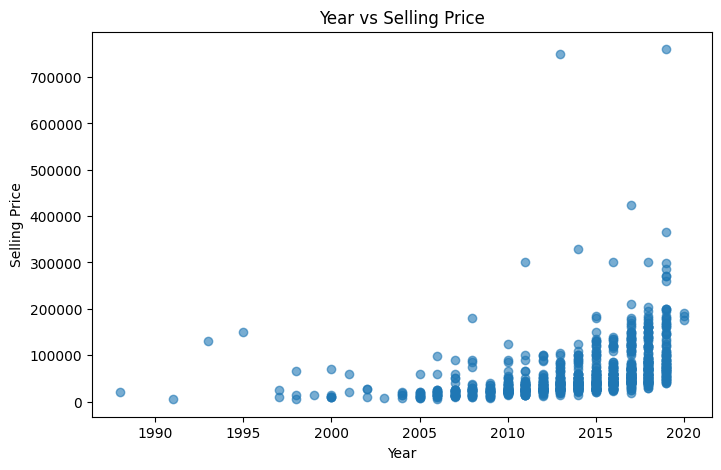

In [13]:
#7. Create a scatter plot of year vs. selling_price to explore the
# relationship between a bike's age and its price.
# (Include your Python code and output in the code box below.)


plt.figure(figsize=(8, 5))
plt.scatter(df['year'], df['selling_price'], alpha=0.6)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price")
plt.show()

In [14]:
# #8.  Convert the seller_type column into numeric format using one-hot
# encoding. Display the first 5 rows of the resulting DataFrame.
# (Include your Python code and output in the code box below.)

import pandas as pd

# One-hot encode seller_type column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

print("First 5 rows after one-hot encoding:")
print(df_encoded.head())

First 5 rows after one-hot encoding:
                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


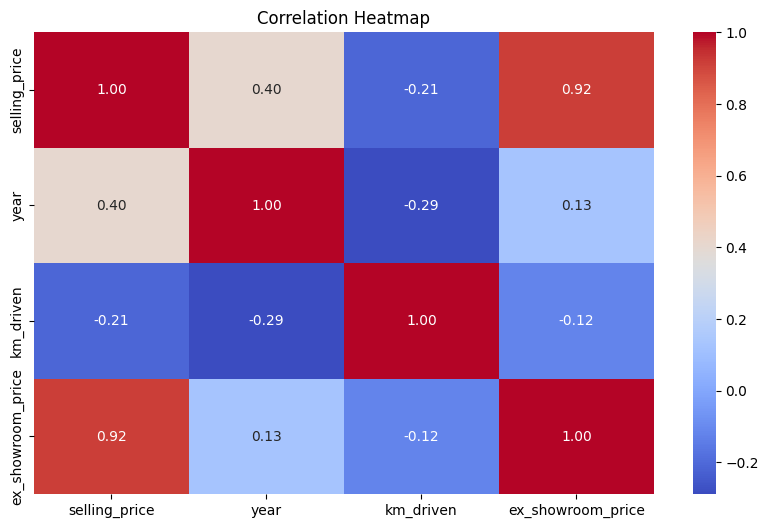

In [15]:
# #9.  Generate a heatmap of the correlation matrix for all numeric columns.
# What correlations stand out the most?
# (Include your Python code and output in the code box below.)


import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#Selling price and year show a strong positive correlation.
#Selling price and km_driven show a negative correlation.
#Newer bikes tend to have higher prices, while heavily used bikes sell for less.

In [16]:
#10. Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.
#(Include your Python code and output in the code box below.)


#Important Factors Affecting Bike Selling Price:-
#a.Year of manufacture: Newer bikes generally have higher selling prices.
#b.Kilometers driven: Bikes with higher mileage tend to have lower prices.
#c.Seller type: Dealer listings usually have higher average prices.
#d.Seller type: Dealer listings usually have higher average prices.


#Data Cleaning & Feature Engineering Performed:-
#a.Handled missing values using appropriate statistical methods.
#b.Removed outliers from km_driven using the IQR method.
#c.Removed outliers from km_driven using the IQR method.
#d. Performed EDA and visualization to understand trends and relationships.


